In [1]:
# 1. Import the necessary libraries.

import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
# 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [5]:
# 3. What should we do with the customer_id column?

# Check values
customer_df.customer.nunique()

9134

In [6]:
# Set the 'customer_id' column as the index
customer_df.set_index('customer', inplace=True)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# OR drop the 'customer_id' column
# customer_df.drop('customer', axis=1)

In [8]:
# 4. Load the continuous and discrete variables into numericals_df and categorical_df variables.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
categorical_df = customer_df.select_dtypes(np.object)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


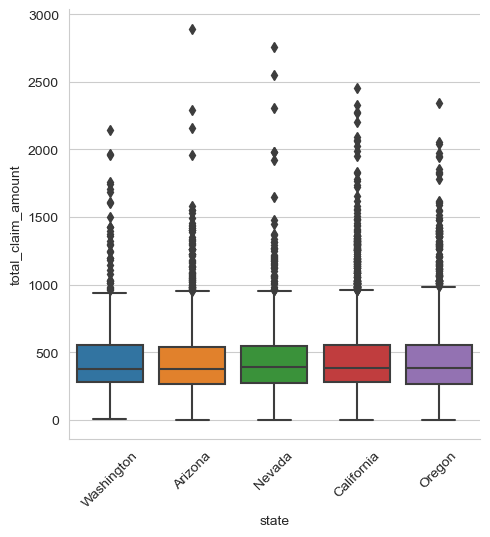

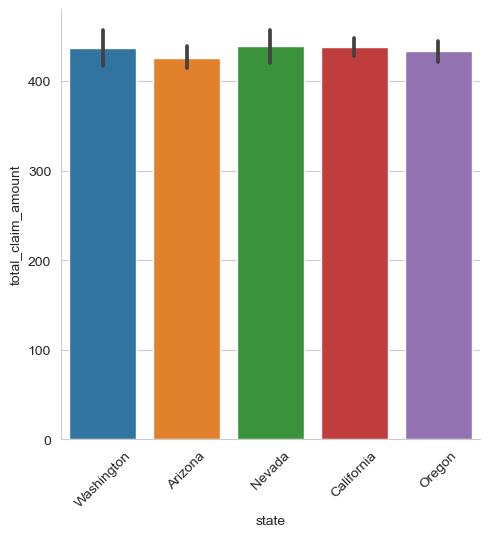

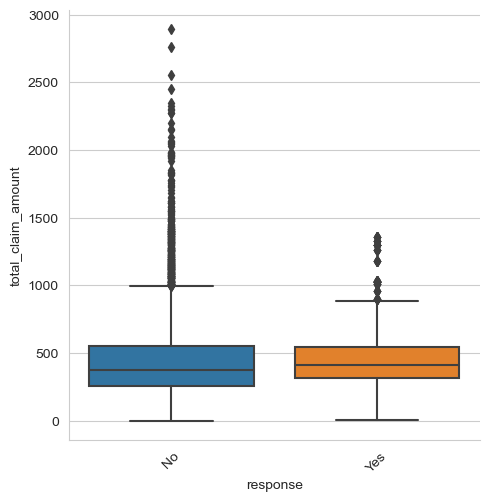

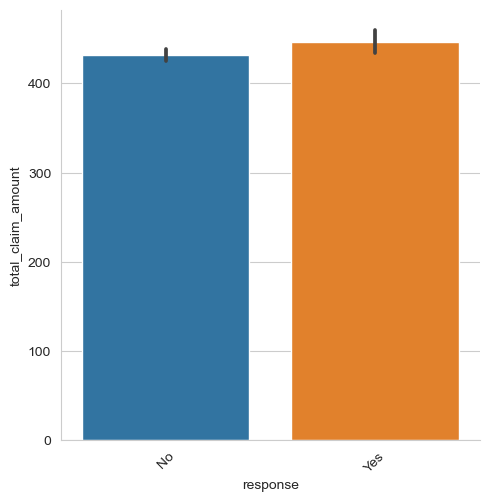

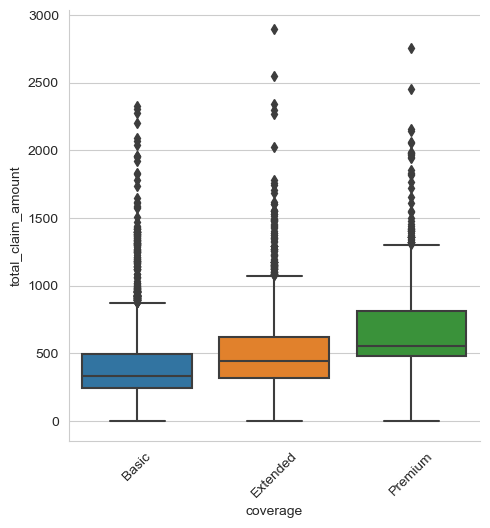

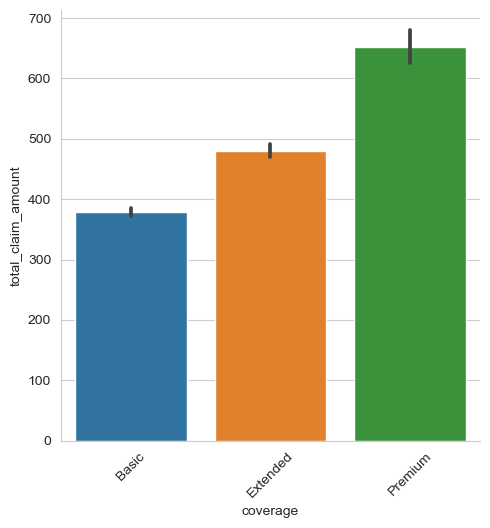

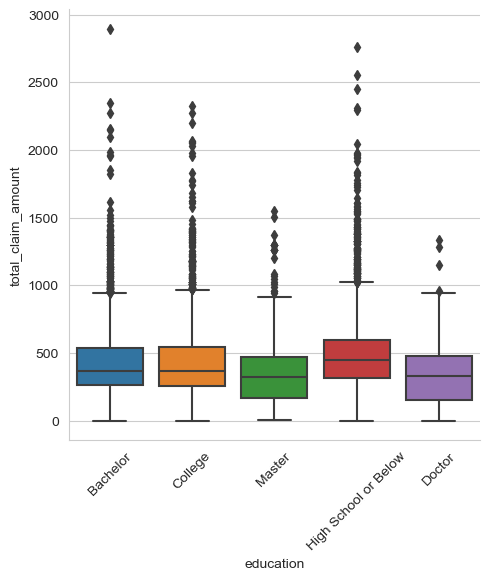

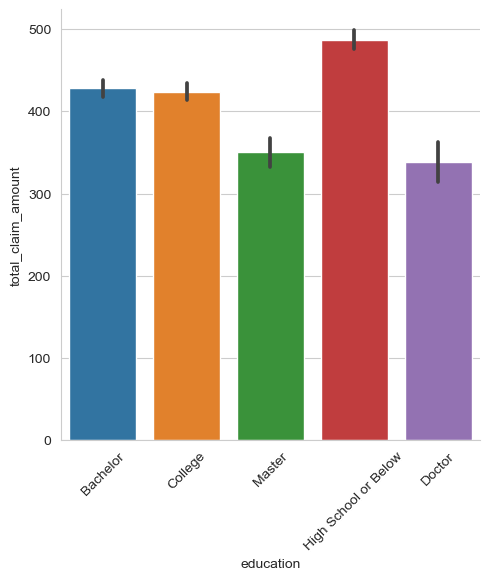

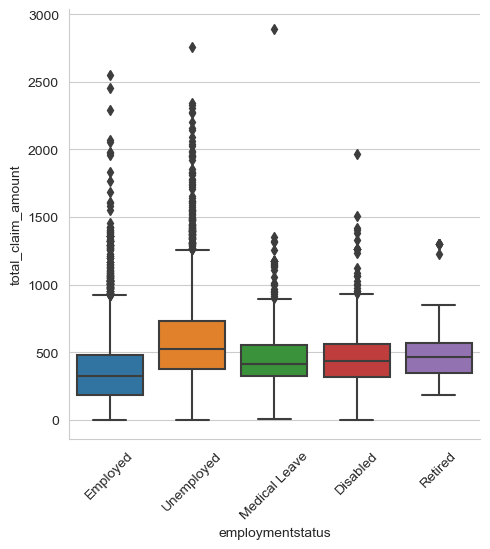

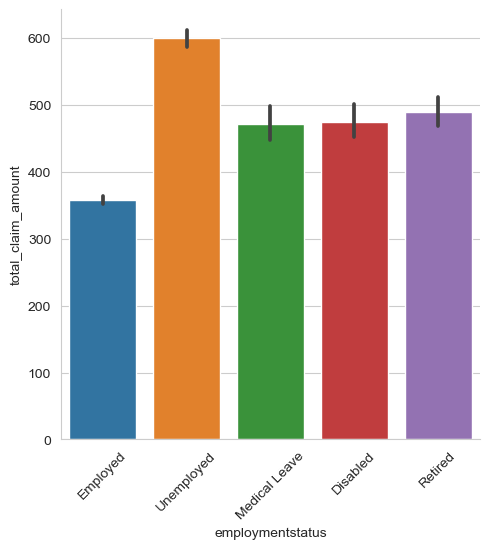

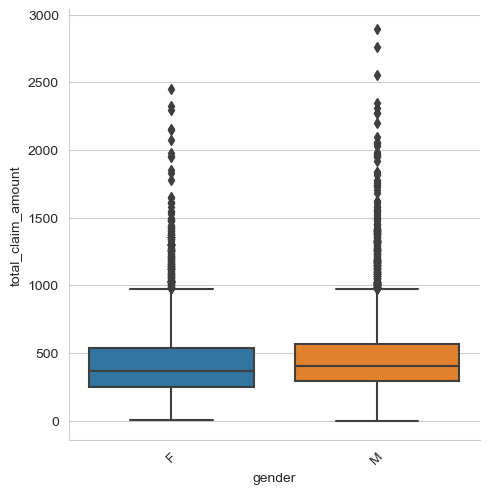

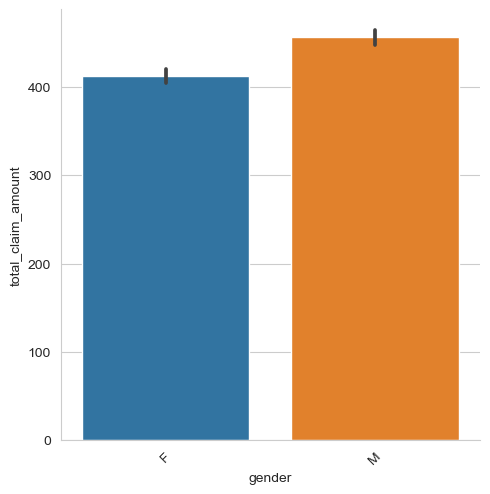

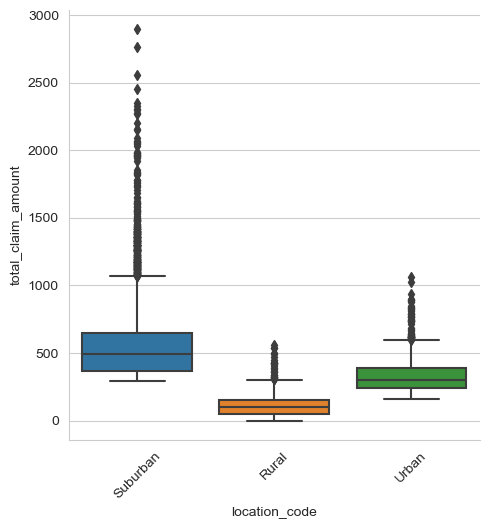

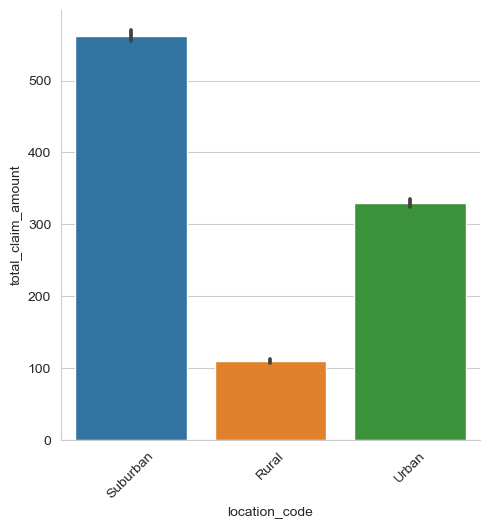

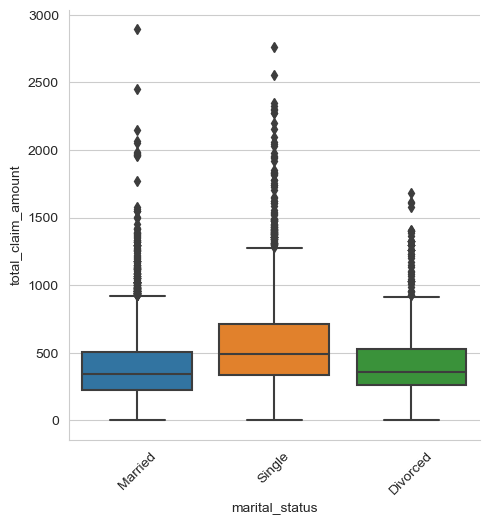

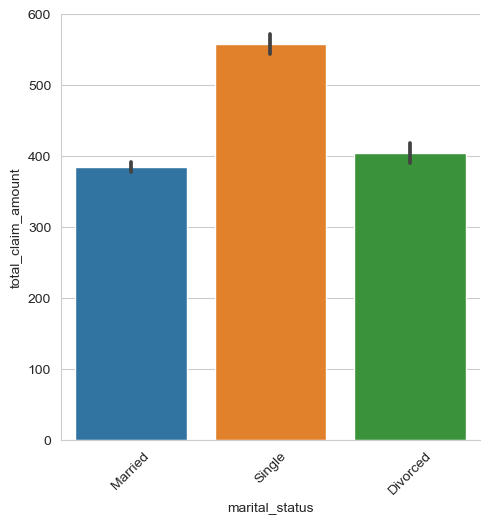

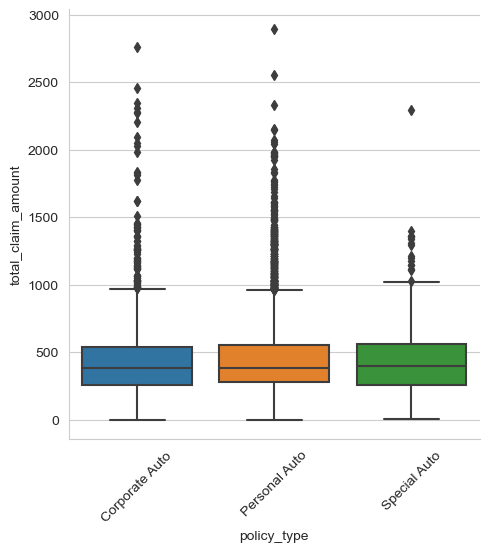

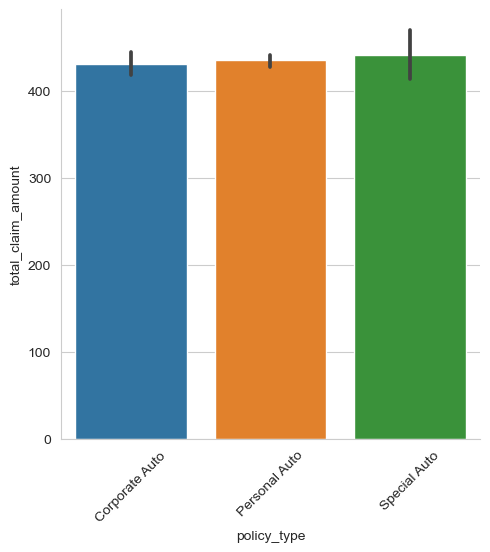

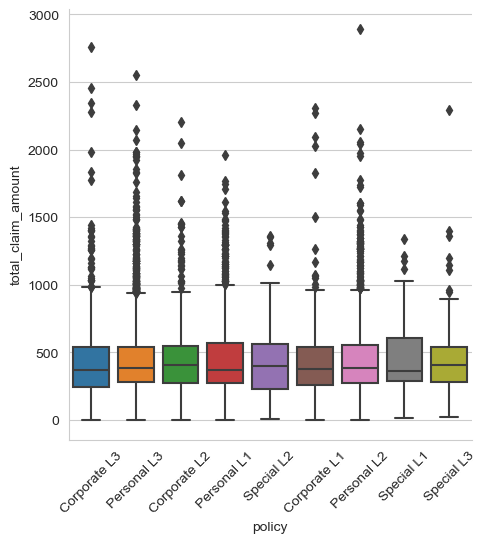

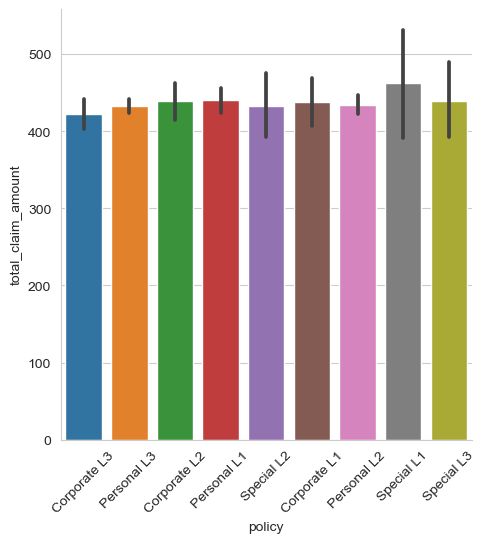

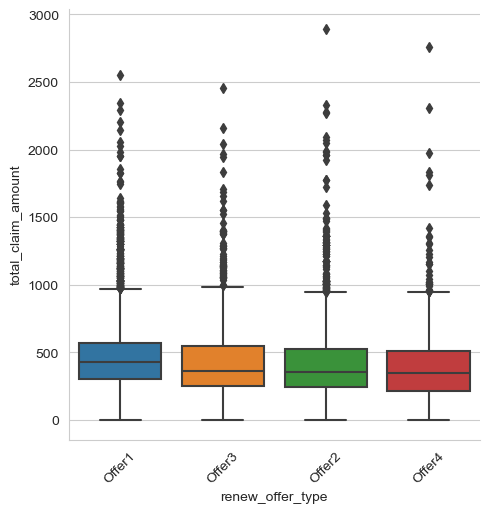

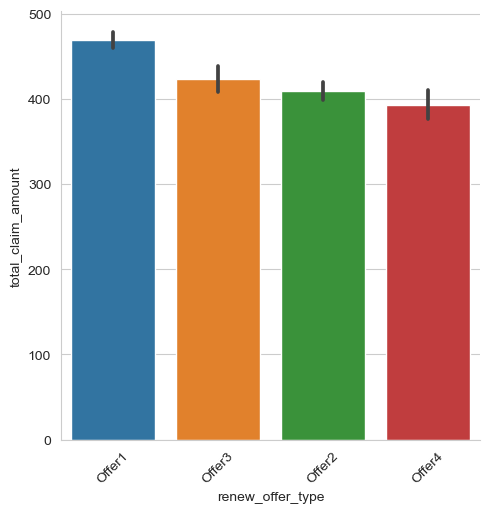

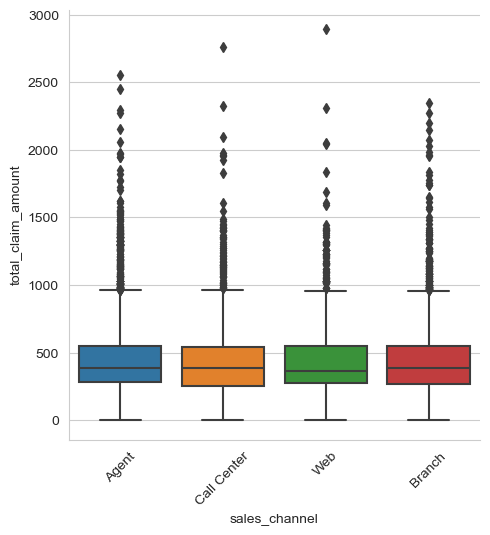

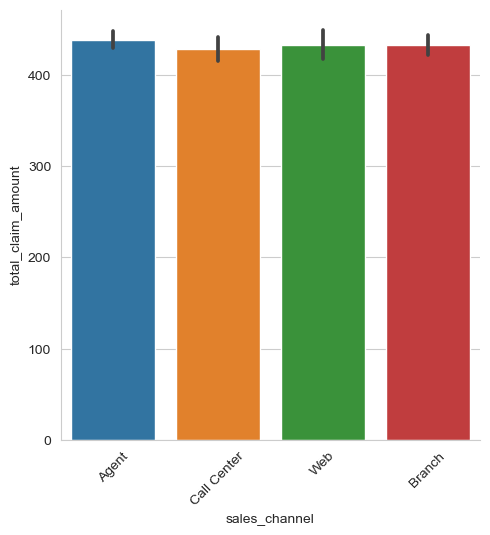

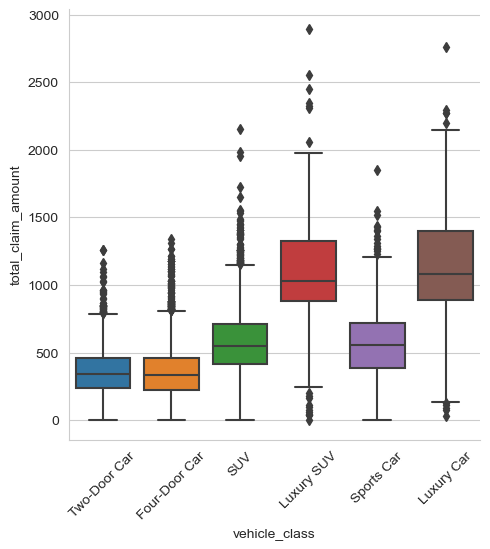

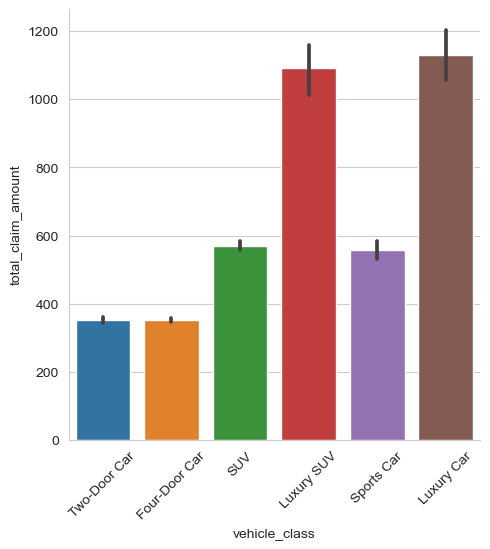

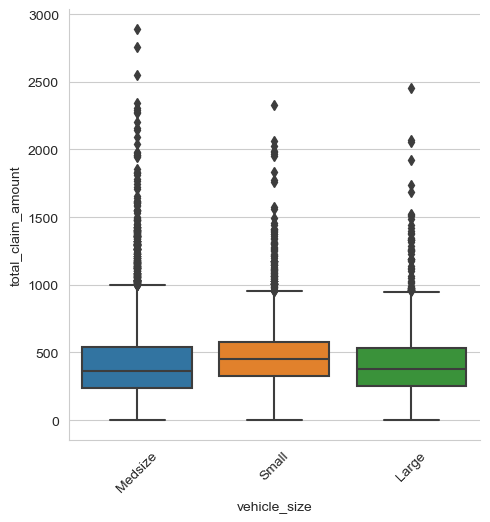

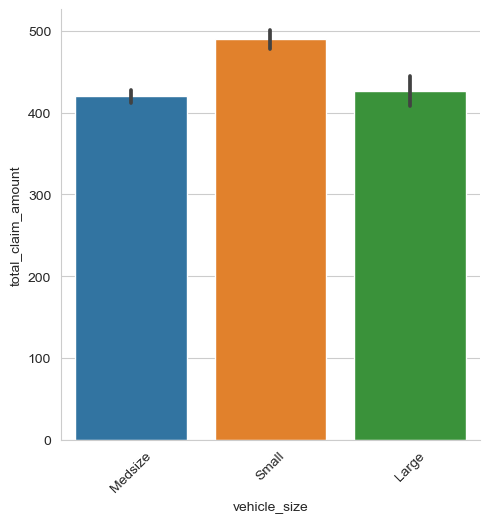

In [10]:
# 5. Plot every categorical variable. 

for col in customer_df.select_dtypes(np.object).columns:
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='box').set_xticklabels(rotation=45)
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='bar').set_xticklabels(rotation=45)
    plt.show()

In [11]:
# What can you see in the plots? 

**`state`**: There is not a lot of variation in Y with different states. Therefore, `state` **is not good in determining the total claim amount**. We can delete the column state.

In [12]:
categorical_df = categorical_df.drop(columns=['state'], axis=1)

**`response`**: There is not a lot of variation in Y with different categories. Therefore, `response` **is not good in determining the total claim amount**. We can delete the column response.

In [13]:
categorical_df = categorical_df.drop(columns=['response'], axis=1)

**`coverage`**: There is a lot of variation in Y with different categories. Therefore, `coverage` **is good in determining the total claim amount**. We shall keep the column coverage.

**`education`**: There is a lof of variation in Y with different categories. Therefore, `education` **is good in determining the total claim amount**. But there is not a lot of variation between Bachelor and College, as well as between Master and Doctor. Thus, we can keep the column education and group education status into 3 categories: ['High school or Below', 'Bachelor or College', 'Doctor or Master'].

In [14]:
def clean_education(x):
    if x in ['Bachelor', 'College']:
        return 'Bachelor or College'
    elif x in ['Master', 'Doctor']:
        return 'Doctor or Master'
    else:
        return x

categorical_df['education'] = list(map(clean_education, categorical_df['education']))

In [15]:
categorical_df.education.unique()

array(['Bachelor or College', 'Doctor or Master', 'High School or Below'],
      dtype=object)

**`employmentstatus`**: There is a lof of variation in Y with different categories. Therefore, `employmentstatus` **is good in determining the total claim amount**. But there is not a lot of variation between Medical Leave,  Disabled and Retired. Thus, we can keep the column employmentstatus and group status into 3 categories: ['Employed', 'Unemployed', 'Other'].

In [16]:
def clean_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Other'
    else:
        return x

categorical_df['employmentstatus'] = list(map(clean_employmentstatus, categorical_df['employmentstatus']))

In [17]:
categorical_df.employmentstatus.unique()

array(['Employed', 'Unemployed', 'Other'], dtype=object)

**`gender`**: There is not a lot of variation in Y with different gender. Therefore, `gender` **is not good in determining the total claim amount**. We can delete the column gender.

In [18]:
categorical_df = categorical_df.drop(columns=['gender'], axis=1)

**`location_code`**: There is a lot of variation in Y with different locations. Therefore, `location_code` **is good in determining the total claim amount**. We shall keep the column location_code.

**`marital_status`**: There is a lot of variation in Y with different marital status. Therefore, `marital_status` **is good in determining the total claim amount**. But there is not a lot of variation between Married and Divorced. Thus, we can keep the column marital_status and group marital status into 2 categories: ['Single', 'Married or Divorced'].

In [19]:
def clean_maritalstatus(x):
    if x in ['Married', 'Divorced']:
        return 'Married or Divorced'
    else:
        return x

categorical_df['marital_status'] = list(map(clean_maritalstatus, categorical_df['marital_status']))

In [20]:
categorical_df.marital_status.unique()

array(['Married or Divorced', 'Single'], dtype=object)

**`policy_type`**: There is not a lot of variation in Y with different policy types. Therefore, `policy_type` **is not good in determining the total claim amount**. We can delete the column policy_type.

In [21]:
categorical_df = categorical_df.drop(columns=['policy_type'], axis=1)

**`policy`**: There is not a lot of variation in Y with different policies. Therefore, `policy` **is not good in determining the total claim amount**. We can delete the column policy.

In [22]:
categorical_df = categorical_df.drop(columns=['policy'], axis=1)

**`renew_offer_type`**: There is not a lot of variation in Y with different renew offer types. Therefore, `renew_offer_type` **is not good in determining the total claim amount**. We can delete the column renew_offer_type.

In [23]:
categorical_df = categorical_df.drop(columns=['renew_offer_type'], axis=1)

**`sales_channel`**: There is not a lot of variation in Y with different sales channels. Therefore, `sales_channel` **is not good in determining the total claim amount**. We can delete the column sales_channel.

In [24]:
categorical_df = categorical_df.drop(columns=['sales_channel'], axis=1)

**`vehicle_class`**: There is a lot of variation in Y with different categories. Therefore, `vehicle_class` **is good in determining the total claim amount**. But there is not a lot of variation between Two-Door Car and Four-Door Car, and between SUV and Sports Car, as well as between Luxury SUV and Luxury Car. Thus, we can keep the column vehicle_class and group vehicle into 3 classes: ['Sedan', 'Sport', 'Luxury'].

In [25]:
def clean_vehicleclass(x):
    if x in ['Two-Door Car', 'Four-Door Car']:
        return 'Sedan'
    elif x in ['SUV', 'Sports Car']:
        return 'Sport'
    else:
        return 'Luxury'

categorical_df['vehicle_class'] = list(map(clean_vehicleclass, categorical_df['vehicle_class']))

In [26]:
categorical_df.vehicle_class.unique()

array(['Sedan', 'Sport', 'Luxury'], dtype=object)

**`vehicle_size`**: There is not a lot of variation in Y with different size. Therefore, `vehicle_size` **is not good in determining the total claim amount**. We can delete the column vehicle_size.

In [27]:
categorical_df = categorical_df.drop(columns=['vehicle_size'], axis=1)

In [28]:
categorical_df.head()

,coverage,education,employmentstatus,location_code,marital_status,vehicle_class
customer,,,,,,
BU79786,Basic,Bachelor or College,Employed,Suburban,Married or Divorced,Sedan
QZ44356,Extended,Bachelor or College,Unemployed,Suburban,Single,Sedan
AI49188,Premium,Bachelor or College,Employed,Suburban,Married or Divorced,Sedan
WW63253,Basic,Bachelor or College,Unemployed,Suburban,Married or Divorced,Sport
HB64268,Basic,Bachelor or College,Employed,Rural,Single,Sedan


In [29]:
# 6. For the categorical data, check if there is any data cleaning that need to perform. 

categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [30]:
categorical_df.education.value_counts()

Bachelor or College     5429
High School or Below    2622
Doctor or Master        1083
Name: education, dtype: int64

In [31]:
categorical_df.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

In [32]:
categorical_df.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [33]:
categorical_df.marital_status.value_counts()

Married or Divorced    6667
Single                 2467
Name: marital_status, dtype: int64

In [34]:
categorical_df.vehicle_class.value_counts()

Sedan     6507
Sport     2280
Luxury     347
Name: vehicle_class, dtype: int64

In [35]:
# Discuss if this information might in some way be used for data cleaning.

Using the `value_counts()` function on categorical columns is a good way to get an overview of the representation of different categories in each column. It can help identify potential issues with the data that may require cleaning, e.g. missing values, outliers or errors. It can also provide insights into the distribution of categories in each column, which may be useful for data analysis and modeling.